<a href="https://colab.research.google.com/github/alik604/mathematical-finance/blob/master/DSP%20on%20SPY%20-%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
# Importing the libraries
import pandas as pd
import math
import numpy as np

import scipy
import scipy.signal as signal
from scipy.fft import *

!pip install fix-yahoo-finance
import fix_yahoo_finance as yf

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [91]:
dataset = yf.download("spy","2010-01-01")
dataset.head()
data = dataset.Close

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


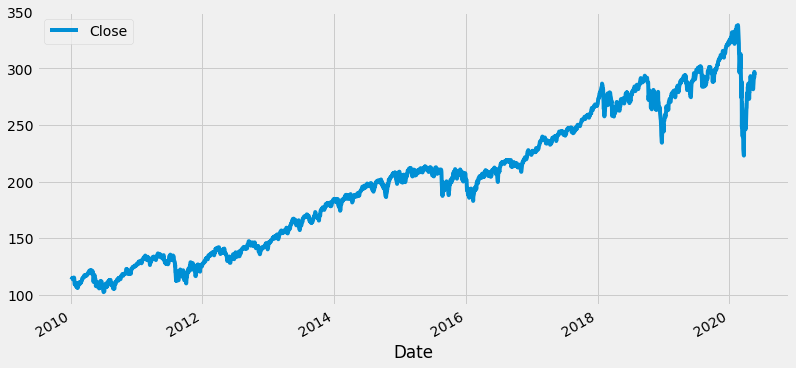

In [92]:
df = pd.DataFrame(data)
df.plot(figsize=(12,6))
data = data.values

## Detrend

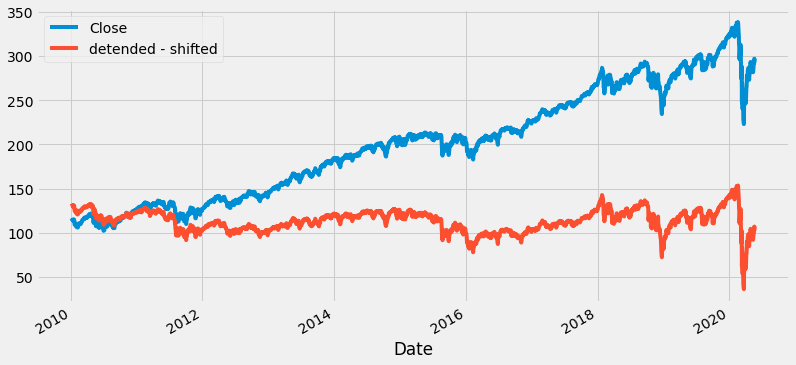

In [93]:
data_detrended = signal.detrend(data)

# df['detended'] = data_detrended
df['detended - shifted'] = data_detrended + df.Close.values[0]
df.plot(figsize=(12,6))

## Discrete Fourier transform via FFT

In [94]:
data_fft = fft(data, workers=-1)
data_fft[:10]

array([ 5.23108000e+05    -0.j        ,  5.37592795e+03+86829.18086328j,
        5.12205096e+03+50177.91867979j, -4.16045366e+03+19719.414756j  ,
        2.61567289e+03+21617.9334869j , -1.67039975e+03+19186.97837425j,
       -3.90853587e+02+17150.15592863j, -3.77592351e+03+15201.3868538j ,
       -8.76306870e+02+10669.72409153j, -5.78595113e+02 +8227.73690003j])

<Figure size 864x432 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


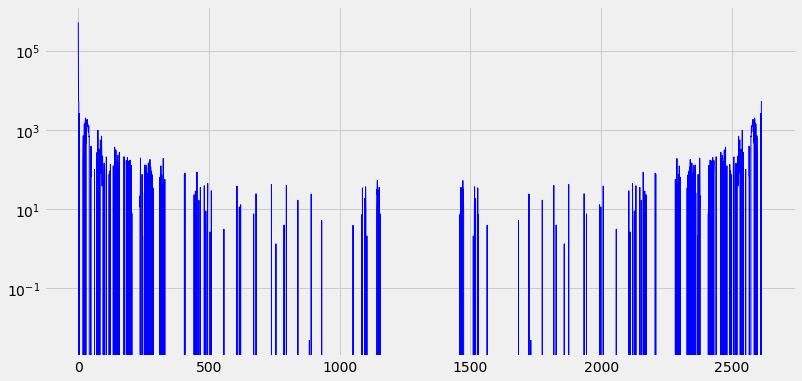

<Figure size 864x432 with 0 Axes>

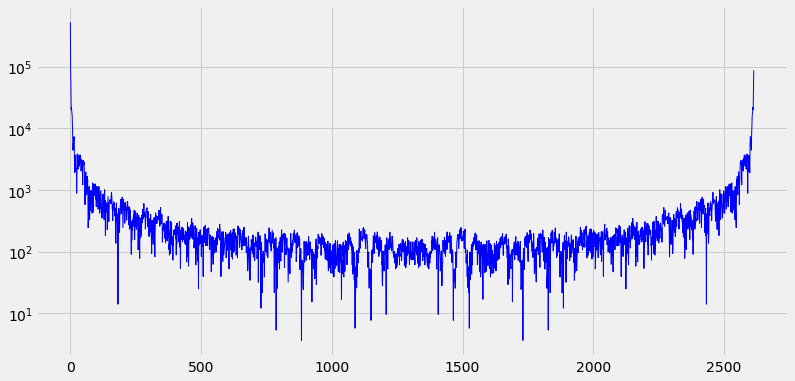

In [95]:
plt.figure(figsize=(12,6))
plt.semilogy(data_fft, '-b', linewidth = 1.0)
plt.show()

plt.figure(figsize=(12,6))
plt.semilogy(abs(data_fft), '-b', linewidth = 1.0)
plt.show()

<Figure size 864x432 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


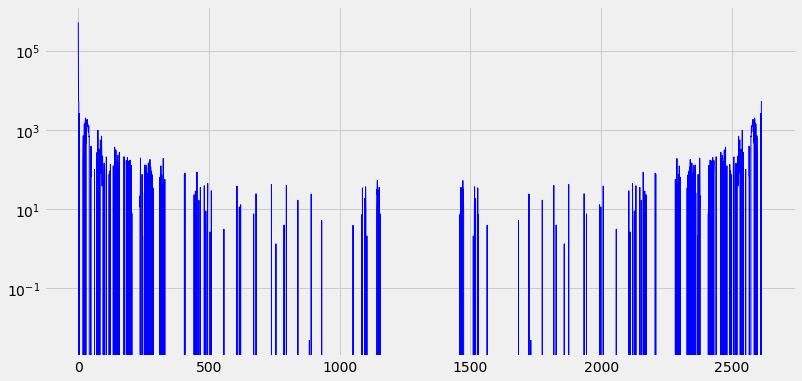

In [96]:
smoothed = df.Close.rolling(window=1).mean().dropna()
smoothed = smoothed.values

data_fft = fft(smoothed, workers=-1)
plt.figure(figsize=(12,6))
plt.semilogy(data_fft, '-b', linewidth = 1.0)
plt.show()

<Figure size 864x432 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


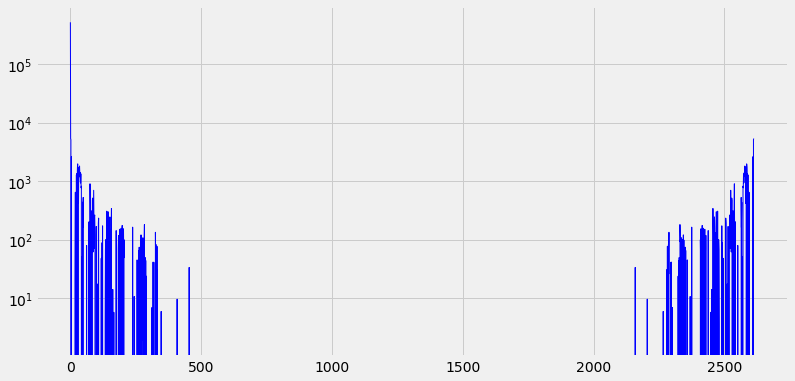

In [97]:
smoothed = df.Close.rolling(window=3).mean().dropna()
smoothed = smoothed.values # to NP array

data_fft = fft(smoothed, workers=-1)
plt.figure(figsize=(12,6))
plt.semilogy(data_fft, '-b', linewidth = 1.0)
plt.show()

<Figure size 864x432 with 0 Axes>

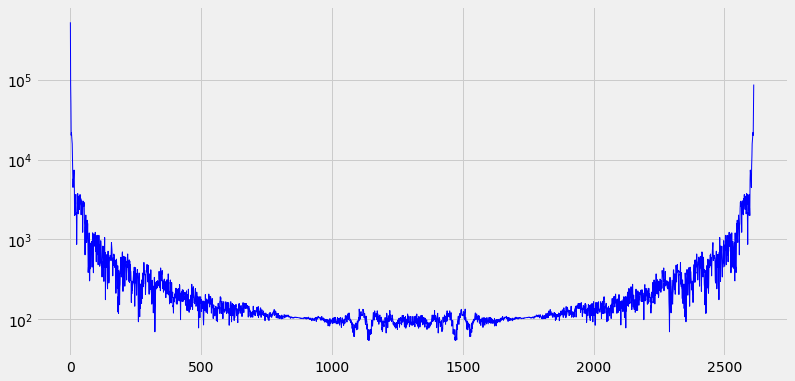

In [98]:
plt.figure(figsize=(12,6))
plt.semilogy(abs(data_fft), '-b', linewidth = 1.0)
plt.show()

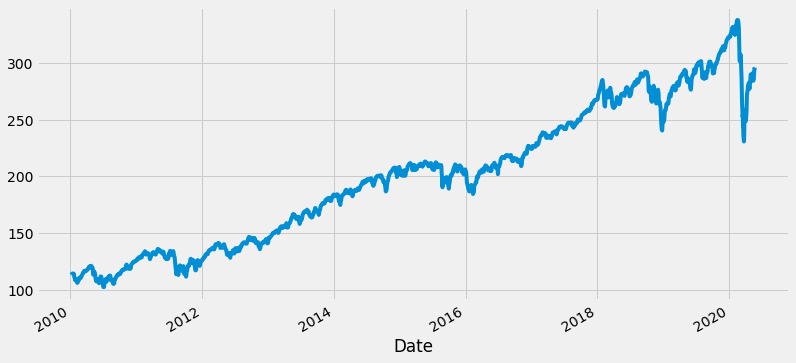

In [99]:
df.Close.rolling(window=3).mean().dropna().plot(figsize=(12,6))

### FFT of daily change

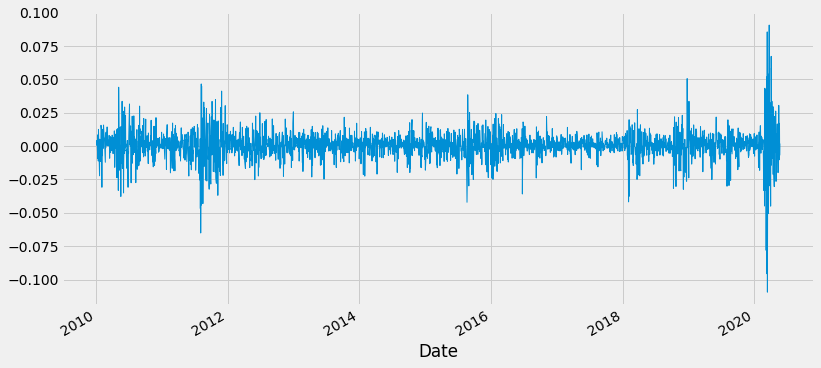

In [100]:
# daily_change = data[:-1] / data[1:] -1 
# data / dataset.Close.shift(-1) - 1
daily_change = dataset.Close.shift(-1) / data - 1
daily_change.plot(figsize=(12,6),linewidth = 1.0)
daily_change = daily_change.values

In [101]:
# check calculatation isnt inverter. might need to * -1 
print(data[:10])
print(daily_change[:10])

[113.330002 113.629997 113.709999 114.190002 114.57     114.730003
 113.660004 114.620003 114.93     113.639999]
[ 0.00264709  0.00070406  0.00422129  0.00332777  0.00139655 -0.00932624
  0.00844623  0.00270456 -0.01122423  0.01249559]


<Figure size 864x432 with 0 Axes>

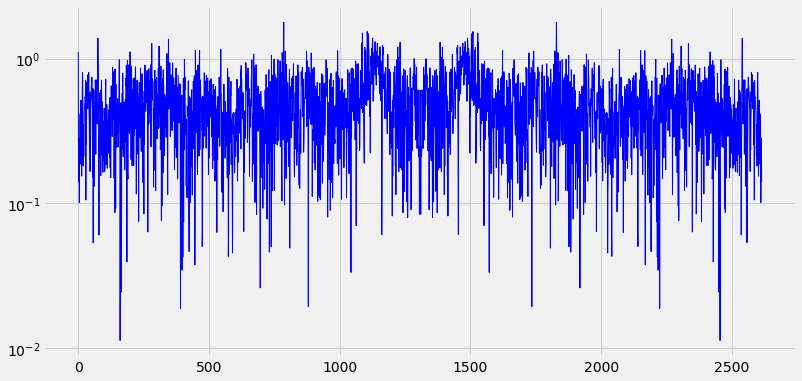

In [102]:
daily_change[np.isnan(daily_change)] = 0
daily_change_fft = fft(daily_change)

plt.figure(figsize=(12,6))
plt.semilogy(abs(daily_change_fft), '-b', linewidth = 1.0)
plt.show()

## Power Spectral Density

> The power spectral density, PSD, describes how the power of your signal is distributed over frequency whilst the DFT shows the spectral content of your signal, the amplitude and phase of harmonics in your signal.

> You pick one or the other depending on what you want to observe/analyze. And no they're not the same as you can see from the equations above and links given. Their spectra are generally not the same. One is estimated as the squared magnitude of the other.


<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'frequency [Hz]')

Text(0, 0.5, 'PSD [V**2/Hz]')

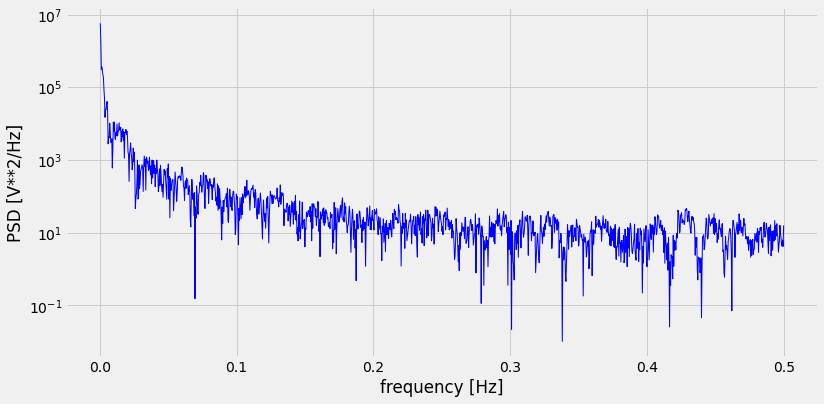

In [103]:
freq, psd = scipy.signal.periodogram(data)

plt.figure(figsize=(12,6))
plt.semilogy(freq[1:],psd[1:], '-b', linewidth = 1.0)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [0]:
# def test():
#     fft(data.values, workers=2)

# if __name__ == '__main__':
#     import timeit
#     print(timeit.timeit("test()", setup="from __main__ import test", number = 25000))